In [5]:
import sys
import pathlib
src_path = pathlib.Path().absolute().parent /"src"
sys.path.append(str(src_path))
import data_functions
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib as plt
import seaborn as sns
import pickle
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train = data_functions.get_dataframes()

In [7]:
x_train.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

x_test.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

In [8]:
x_train.head()

,amount_tsh,gps_height,basin,region,lga,population,construction_year,extraction_type_group,payment_type,water_quality,quality_group,quantity,quantity_group,source_type,waterpoint_type
id,,,,,,,,,,,,,,,
69572,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1999,gravity,annually,soft,good,enough,enough,spring,communal standpipe
8776,0.0,1399,Lake Victoria,Mara,Serengeti,280,2010,gravity,never pay,soft,good,insufficient,insufficient,rainwater harvesting,communal standpipe
34310,25.0,686,Pangani,Manyara,Simanjiro,250,2009,gravity,per bucket,soft,good,enough,enough,dam,communal standpipe multiple
67743,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1986,submersible,never pay,soft,good,dry,dry,borehole,communal standpipe multiple
19728,0.0,0,Lake Victoria,Kagera,Karagwe,0,0,gravity,never pay,soft,good,seasonal,seasonal,rainwater harvesting,communal standpipe


In [9]:
x_train_nums= x_train.select_dtypes(exclude="object")
x_train_cat= x_train.select_dtypes(include="object")

In [10]:
ohe=OneHotEncoder(drop='first', sparse=False)

In [11]:
x_train_ohe=pd.DataFrame(ohe.fit_transform(x_train_cat), columns= ohe.get_feature_names(x_train_cat.columns), index= x_train_cat.index)
sum(x_train_ohe.isna().sum())

0

In [12]:
x_train_ohe.shape

(59400, 202)

In [13]:
si=SimpleImputer()
x_nums_si=pd.DataFrame(si.fit_transform(x_train_nums), index= x_train_nums.index, columns= x_train_nums.columns)

In [14]:
scale= StandardScaler()
x_train_nums_scaled= pd.DataFrame(scale.fit_transform(x_nums_si), index= x_nums_si.index, columns= x_nums_si.columns)

In [15]:
x_final= x_train_nums_scaled.join(x_train_ohe)

In [16]:
x_final.head()

,amount_tsh,gps_height,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,...,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,1.895665,1.041252,-0.150399,0.733857,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8776,-0.105970,1.054237,0.212290,0.745416,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34310,-0.097630,0.025541,0.148660,0.744365,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67743,-0.105970,-0.584751,-0.258570,0.720196,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19728,-0.105970,-0.964200,-0.381587,-1.366788,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
x_val, x_val_test, y_val, y_val_test= train_test_split(x_final, y_train, random_state=2020)

In [19]:
bin_y = lambda x: 1 if x == 'functional' else 0
y_tr_final = y_val['status_group'].apply(bin_y)
y_te_final = y_val_test['status_group'].apply(bin_y)

In [15]:
# from imblearn.over_sampling import SMOTE
# sm1 = SMOTE(random_state=2020)

In [25]:
# X_tr_sm, y_tr_sm = sm1.fit_resample(x_val, y_val)

In [22]:
y_tr_final.shape

(44550,)

In [ ]:
# rf=RandomForestClassifier()
# rf.fit(X_tr_sm,y_tr_sm)
# y_pred_rf_1=rf.predict(x_val_test)

In [24]:
kn_2 = KNeighborsClassifier(n_neighbors = 15)
kn_2.fit(x_val,y_tr_final)
y_pred_kn_2=kn_2.predict(x_val_test)

In [ ]:
#kn.kneighbors_graph()

In [21]:
#from mlxtend.plotting import plot_decision_regions

In [27]:
print(classification_report(y_te_final, y_pred_kn_2))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      6840
           1       0.77      0.83      0.80      8010

    accuracy                           0.77     14850
   macro avg       0.78      0.77      0.77     14850
weighted avg       0.77      0.77      0.77     14850



In [28]:
from sklearn.metrics import plot_confusion_matrix

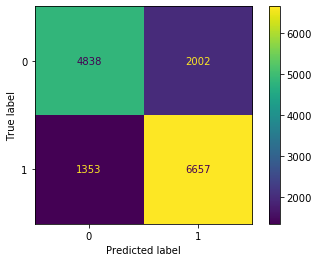

In [30]:
plot_confusion_matrix(kn_2, x_val_test,y_te_final)

In [33]:
kn_3 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
kn_3.fit(x_val,y_tr_final)
y_pred_kn_3=kn_3.predict(x_val_test)
print(classification_report(y_te_final, y_pred_kn_3))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      6840
           1       0.78      0.80      0.79      8010

    accuracy                           0.77     14850
   macro avg       0.77      0.77      0.77     14850
weighted avg       0.77      0.77      0.77     14850



In [34]:
kn_4 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', p = 1)
kn_4.fit(x_val,y_tr_final)
y_pred_kn_4=kn_4.predict(x_val_test)
print(classification_report(y_te_final, y_pred_kn_4))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      6840
           1       0.78      0.80      0.79      8010

    accuracy                           0.77     14850
   macro avg       0.77      0.77      0.77     14850
weighted avg       0.77      0.77      0.77     14850



In [35]:
kn_5 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', p = 1, algorithm= 'kd_tree')
kn_5.fit(x_val,y_tr_final)
y_pred_kn_5=kn_5.predict(x_val_test)
print(classification_report(y_te_final, y_pred_kn_5))
#same as kn_3 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      6840
           1       0.78      0.80      0.79      8010

    accuracy                           0.77     14850
   macro avg       0.77      0.77      0.77     14850
weighted avg       0.77      0.77      0.77     14850



In [36]:
kn_6 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', p = 1, algorithm = 'brute')
kn_6.fit(x_val,y_tr_final)
y_pred_kn_6=kn_6.predict(x_val_test)
print(classification_report(y_te_final, y_pred_kn_6))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      6840
           1       0.78      0.80      0.79      8010

    accuracy                           0.77     14850
   macro avg       0.77      0.77      0.77     14850
weighted avg       0.77      0.77      0.77     14850



In [37]:
kn_7 = KNeighborsClassifier(n_neighbors = 2)
kn_7.fit(x_val,y_tr_final)
y_pred_kn_7=kn_7.predict(x_val_test)
print(classification_report(y_te_final, y_pred_kn_7))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      6840
           1       0.82      0.65      0.73      8010

    accuracy                           0.74     14850
   macro avg       0.75      0.74      0.73     14850
weighted avg       0.75      0.74      0.73     14850



In [39]:
kn_8 = KNeighborsClassifier(n_neighbors = 2, weights = 'distance', p = 1, algorithm = 'brute')
kn_8.fit(x_val,y_tr_final)
y_pred_kn_8=kn_8.predict(x_val_test)
print(classification_report(y_te_final, y_pred_kn_8))


              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6840
           1       0.79      0.74      0.77      8010

    accuracy                           0.76     14850
   macro avg       0.76      0.76      0.76     14850
weighted avg       0.76      0.76      0.76     14850



In [48]:
kn = KNeighborsClassifier()

In [45]:
params = {'n_neighbors' : [5, 10, 15, 20], 'weights': ['uniform','distance'],
     'p': [1,2],
    'algorithm': ['auto', 'kd_tree', 'brute']}
kn = KNeighborsClassifier()

In [46]:
kn_1_grid_search=GridSearchCV(kn,params,cv=3, return_train_score= True) #feel free to remove return_train_score


In [47]:
kn_1_grid_search.fit(x_val, y_tr_final)

KeyboardInterrupt: 